### 数据无量纲化：将不同规格的数据转换到同一规格，或不同分布数据转换到某个特定分布的需求。梯度，矩阵和距离类算法中，无量纲化加快运算速率，（但是决策树不需要无量纲化，决策树只是判断分类，判断分类，决策树可以把任何数据都处理好）

### preprocessing.MinMaxScaler : 当数据(x)按照最小值中心化后（减去最小值），再按照极差（最大值-最小值）缩放，数据移动了最小值个单位，并且会被收敛到【0，1】之间，而这个过程，就叫做数据归一化，归一化后数据服从正态分布.

In [3]:
from sklearn.preprocessing import MinMaxScaler
data=[[-1,5],[-0.5,6],[0,10],[1,18]]
import pandas as pd
pd.DataFrame(data)

,0,1
0,-1.0,5
1,-0.5,6
2,0.0,10
3,1.0,18


In [4]:
scaler=MinMaxScaler()
scaler=scaler.fit(data)#生成min(x)和max(x)
result=scaler.transform(data)#导出结果
result

array([[0.        , 0.        ],
       [0.25      , 0.07692308],
       [0.5       , 0.38461538],
       [1.        , 1.        ]])

In [5]:
result_=scaler.fit_transform(data)
result_

array([[0.        , 0.        ],
       [0.25      , 0.07692308],
       [0.5       , 0.38461538],
       [1.        , 1.        ]])

In [6]:
scaler.inverse_transform(result)#归一化逆转

array([[-1. ,  5. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

#### 参数feature_range 实现将归一化到[0,1]以外的值

In [7]:
data=[[-1,5],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler(feature_range=[5,10])
result = scaler.fit_transform(data)
result

array([[ 5.        ,  5.        ],
       [ 6.25      ,  5.38461538],
       [ 7.5       ,  6.92307692],
       [10.        , 10.        ]])

#### partial_fit：当x很多时，fit会报错解决不了如此多的数据此时用partial_fit作为训练接口

In [8]:
data=[[-1,4],[-0.5,6],[5,9],[1,18]]
scaler = MinMaxScaler(feature_range=[5,10])
result = scaler.partial_fit(data)
result = result.transform(data)
result

array([[ 5.        ,  5.        ],
       [ 5.41666667,  5.71428571],
       [10.        ,  6.78571429],
       [ 6.66666667, 10.        ]])

In [9]:
#numpy 归一化
import numpy as np
x=np.array([[-1,4],[-0.5,6],[5,9],[1,18]])
x_nor=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x_nor

array([[0.        , 0.        ],
       [0.08333333, 0.14285714],
       [1.        , 0.35714286],
       [0.33333333, 1.        ]])

In [10]:
x-x.min(axis=0)

array([[ 0. ,  0. ],
       [ 0.5,  2. ],
       [ 6. ,  5. ],
       [ 2. , 14. ]])

In [11]:
#numpy 逆转归一化
x=x_nor * (x.max(axis=0)-x.min(axis=0)) +x.min(axis=0)
x

array([[-1. ,  4. ],
       [-0.5,  6. ],
       [ 5. ,  9. ],
       [ 1. , 18. ]])

In [12]:
x=np.array([[-1,4],[-0.5,6],[5,9],[1,18]])
y=np.array([-1,4])
x-y

array([[ 0. ,  0. ],
       [ 0.5,  2. ],
       [ 6. ,  5. ],
       [ 2. , 14. ]])

In [13]:
x=np.array([[-1,4],[-0.5,6],[5,9],[1,18]])
y=np.array([[-1,4],[-0.5,6],[5,9],[1,18]])
x-y

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

### preprocessing.StandardScaler：标准化，服从标准正态分布

In [14]:
from sklearn.preprocessing import StandardScaler
data=[[-1,2],[-0.5,6],[0,10],[1,18]]

In [15]:
scaler = StandardScaler()
scaler = scaler.fit(data)
scaler.mean_#sklearn数据预处理自动会调节轴向

array([-0.125,  9.   ])

In [16]:
scaler.var_

array([ 0.546875, 35.      ])

In [17]:
x_std = scaler.transform(data)
x_std

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [18]:
x_std.mean(axis=0)

array([0., 0.])

In [19]:
x_std.std(axis=0)

array([1., 1.])

In [20]:
scaler.inverse_transform(x_std)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

### 大多数机器学习算法中选择标准化，因为MinMaxScaler会将所有数据压缩在[0,1]之间会很不正常

### 其他中位数化什么的在D盘数据挖掘第三节，踩踩的学习中

### 数据预处理，处理缺失值

In [21]:
import pandas as pd
data = open(r'D:/数据分析题目/数据集/03数据预处理和特征工程/Narrativedata.csv',encoding='utf-8')
data = pd.read_csv(data)
data.drop('Unnamed: 0',inplace=True,axis=1)

In [22]:
data.head(10)

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No
5,NaN,male,Q,No
6,54.0,male,S,No
7,2.0,male,S,No
8,27.0,female,S,Yes
9,14.0,female,C,Yes


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


In [24]:
data.isnull().sum()

Age         177
Sex           0
Embarked      2
Survived      0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
import numpy as np

In [26]:
data.shape

(891, 4)

In [27]:
data_Age = data.loc[:,'Age'].values.reshape(-1,1)
data_Age.shape

(891, 1)

In [28]:
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan,strategy='median')
imp_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)

In [29]:
imp_mean = imp_mean.fit_transform(data_Age)
imp_median = imp_median.fit_transform(data_Age)
imp_0 = imp_0.fit_transform(data_Age)

In [30]:
data.loc[:,'Age']=imp_mean
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


In [31]:
data_Embarked=data.loc[:,"Embarked"].values.reshape(-1,1)

In [32]:
imp_mode = SimpleImputer(missing_values = np.nan,strategy="most_frequent")
imp_mode = imp_mode.fit_transform(data_Embarked)
data.loc[:,"Embarked"] = imp_mode
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


###  numpy和pandas填补缺失值

In [33]:
data_ = open(r'D:/数据分析题目/数据集/03数据预处理和特征工程/Narrativedata.csv',encoding='utf-8')
data_ = pd.read_csv(data_)
data_.drop('Unnamed: 0',inplace=True,axis=1)
data_.isnull().sum()

Age         177
Sex           0
Embarked      2
Survived      0
dtype: int64

In [34]:
data_.loc[:,"Age"]=data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].median())#fillna在DataFrame填补所有缺失值的列
data_.dropna(axis=0,inplace=True)#删除缺失值所在行

In [35]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
Age         889 non-null float64
Sex         889 non-null object
Embarked    889 non-null object
Survived    889 non-null object
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


### 处理分类型特征：编码与哑变量

#### 机器学习中大多数算法（逻辑回顾，支持向量机SVM，k近邻算法）只能处理数据，但在sklearn中除了专门用来处理文字的算法，其他算法在fit的时候都要求输入数组或矩阵模式（朴素贝叶斯和决策树都可以处理文字，但是sklearn必须导入数字），因此我们需要将文字数据进行编码，转换成编码（如【‘支付宝’，‘微信’，‘信用卡’】）

### preprocessing.LabelEncoder：标签专用，能够将分类转换成分类数值

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
y = data.iloc[:,-1]  #要输入的是标签，不是特征矩阵，所以允许一维
le = LabelEncoder() #实例化
le = le.fit(y)      #导入数据
label = le.transform(y) #transform接口调取结果
le.classes_ #查看标签有多少属性

array(['No', 'Unknown', 'Yes'], dtype=object)

In [38]:
data.iloc[:,-1]=label

In [39]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


### preprocessing.OrdinalEncoder : 特征专用，能够将分类特征转换为分类数值

In [40]:
from sklearn.preprocessing import OrdinalEncoder
data_ = data.copy()
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_#categroies_帮你查看每个特征中的类别

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [41]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data.iloc[:,1:-1])

In [42]:
data_.head(10)

,Age,Sex,Embarked,Survived
0,22.000000,1.0,2.0,0
1,38.000000,0.0,0.0,2
2,26.000000,0.0,2.0,2
3,35.000000,0.0,2.0,2
4,35.000000,1.0,2.0,0
5,29.699118,1.0,1.0,0
6,54.000000,1.0,2.0,0
7,2.000000,1.0,2.0,0
8,27.000000,0.0,2.0,2
9,14.000000,0.0,0.0,2


思考这种转换是否可行：                                                                                                                                                                                      1.舱门(S,C,Q)三种取值独立，彼此之间完全没有联系，S 不等于 C 不等于 Q，这是名义变量.                                                                                    2.学历(小学，初中，高中)三种非完全独立，性质上高中>初中>小学，学历有高低，但学历直接不可相互计算，这是有序变量                                 3.体重(>45kg,>90kg,>135kg)，取值之间各有联系，且可以相互计算，这是有距变量                                                                                                但在对特征进行编码中，这三种都转化为[0,1,2],这三种在算法看来都是连续且可以计算的，这是不准确的，所以把特征分类换成数字时忽略了特征自带的属性，传达一种不准确的信息，影响建模，因此除了可以计算的变量要用哑变量来计算

###  preprocessing.OneHotEncoder:独热编码,创建哑变量

In [43]:
from sklearn.preprocessing import OneHotEncoder
x = data.copy()
x.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [44]:
enc = OneHotEncoder(categories="auto") #categories="auto"自动查看遍历特征分类
enc = enc.fit(x.iloc[:,1:-1])
result=enc.transform(x.iloc[:,1:-1])#返回稀疏矩阵对象
result

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [45]:
result.toarray() #转化成数组

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [46]:
enc.inverse_transform(result)#还原

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

In [47]:
enc.get_feature_names() #哑变量对应特征中哪个类别

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [48]:
#将哑变量拼接入data数据
data__=pd.concat([data,pd.DataFrame(result.toarray())],axis=1)
data__.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0


In [49]:
data__.drop(labels=['Sex','Embarked'],axis=1,inplace=True)
data__.head()

,Age,Survived,0,1,2,3,4
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [50]:
data__.columns=["Age","Survived",'x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S']

In [51]:
data__.head()

,Age,Survived,x0_female,x0_male,x1_C,x1_Q,x1_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


### 处理连续型特征：二分化与分箱
#### preprocessing.Binarizer : 二分化，根据阈值将数据二分化（0或1），用于处理连续型变量.大于阈值的值设置为1，小于或等于阈值的值设置为0

In [52]:
#将年龄2值化
data_2 = data.copy()
from sklearn.preprocessing import Binarizer
x=data_2.iloc[:,0].values.reshape(-1,1) #类为特征专用，因此不能用一维数组
transformer =  Binarizer(threshold=30).fit_transform(x) #阈值设置为30 
data_2.iloc[:,0]=transformer
data_2.head(10)

,Age,Sex,Embarked,Survived
0,0.0,male,S,0
1,1.0,female,C,2
2,0.0,female,S,2
3,1.0,female,S,2
4,1.0,male,S,0
5,0.0,male,Q,0
6,1.0,male,S,0
7,0.0,male,S,0
8,0.0,female,S,2
9,0.0,female,C,2


#### preprocessing.KBinsDiscretizer：分箱，将连续性变量排序后再按顺序分箱后编码
##### n_bins：每个特征分类个数，默认5，一次会被运用到所有导入特征中，如果想每个特征分的类别个数不同，那就一个一个导入特征
##### encode：编码的方式，默认“onehot”，“onehot”:默认做哑变量，返回一个稀疏矩阵“oneinal”:每个特征每个箱都被编为一个整数，返回每一列为一个特征，每个特征下含有不同整数编码的箱，“onehot-dense”：哑变量，返回一个密集矩阵
##### strategy：默认“quantile","uniform":表示等宽分箱，即每个特征之间每个箱的最大值之间的差为(max(x)-min(x))/(n_bins),"quantile":等位分箱，每个特征的每个箱中的样本数目相同,"kmeans"：聚类分箱，每一个箱中的值到最近的一维k均值簇心的距离都相等

In [53]:
from sklearn.preprocessing import KBinsDiscretizer
x =data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3,encode="ordinal",strategy="uniform")
data.iloc[:,0] =est.fit_transform(x)
data.head(10)

,Age,Sex,Embarked,Survived
0,0.0,male,S,0
1,1.0,female,C,2
2,0.0,female,S,2
3,1.0,female,S,2
4,1.0,male,S,0
5,1.0,male,Q,0
6,2.0,male,S,0
7,0.0,male,S,0
8,1.0,female,S,2
9,0.0,female,C,2


In [54]:
set(est.fit_transform(x).ravel())

{0.0, 1.0, 2.0}

## 特征工程 
#### feature_extraction:特征提取    feature_creation:特征创造    feature_selection:特征选择

In [1]:
import pandas as pd
data = open(r'D:\数据分析题目\数据集\03数据预处理和特征工程\digit recognizor.csv')
data = pd.read_csv(data)

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x=data.iloc[:,1:]
y=data.iloc[:,1]
x.shape#数据太多，神经网络和支持向量积跑不出来，knn要半小时

(42000, 784)

#### Filter：过滤法
##### VarianceThreshold：方差过滤，这是通过特征本身的方差来筛选特征的类.比如一个特征本身的方差很小，这就表示样本在这个特征中没有差距，因此方差过滤，先消除方差为0或者很小的特征

In [4]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()           #threshold 为方差阈值，默认为0
x_var0 = selector.fit_transform(x)

In [5]:
x_var0.shape

(42000, 708)

In [6]:
import numpy as np
np.median(x.var(axis=0).values)#看特征方差的中位数

1352.286703180131

In [8]:
x_fsvar=VarianceThreshold(threshold=np.median(x.var(axis=0).values)).fit_transform(x)
x_fsvar.shape

(42000, 392)

#### 当特征是二分类时候，特征的取值就是伯努利随机变量，这些变量的方差可以计算为p(1-p),因此百分之八十数据都有这个特征时方差为0.8*（1-0.8），因为绝大多数数据都有此特征可以删除

In [9]:
x_bvar = VarianceThreshold(threshold=.8*(1-.8)).fit_transform(x)
x_bvar.shape

(42000, 685)

In [10]:
#KNN和随机森林在不同方差过滤效果对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN #最近邻算法，距离聚类，要遍历特征升维计算距离
from sklearn.model_selection import cross_val_score
import numpy as np

In [11]:
x= data.iloc[:,1:]
y= data.iloc[:,0]
x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)

In [12]:
x_fsvar.shape

(42000, 392)

cross_val_score(KNN(),x,y,cv=5).mean()#交叉验证KNN()要算一小时以上           #结果为0.9658
、、、、cross_val_score(KNN(),x_fsvar,y,cv=5).mean() #结果为0.9659，时间减少20分钟，运行时间快1/3

In [69]:
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),x,y,cv=5).mean()

9.59 s ± 319 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
cross_val_score(RFC(n_estimators=10,random_state=0),x,y,cv=5).mean()

0.9373571428571429

In [75]:
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),x_fsvar,y,cv=5).mean()#快的效果不明显,准确率也上升了，
#因为随机森林在特征很多时只会挑选很小一部分，对单棵树准确率要求不那么高，但是KNN只有一棵树，要遍历所有特征

9.47 s ± 129 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fsvar,y,cv=5).mean()

0.9390476190476191

阈值很大如果过滤的大都是噪音时模型效果会很好，但是过滤了很多有效特征时模型可能会很糟糕，阈值很大会降低运行时间，模型越遍历降低速率越明显///
阈值很小时对模型效果不会有太大影响，运行时间可能降低

### 卡方过滤：专门针对离散型标签,检验特征和标签的相关性,且如果卡方过滤发现某个特征所有值相同会提示先用方差过滤一下

In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest#统计量选择
from sklearn.feature_selection import chi2 #卡方检验

In [14]:
x_fschi = SelectKBest(chi2,k=350).fit_transform(x_fsvar,y)#选择前300个卡方值最高的的特征

In [15]:
x_fschi.shape

(42000, 350)

In [25]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=10).mean()

0.9406190476190476

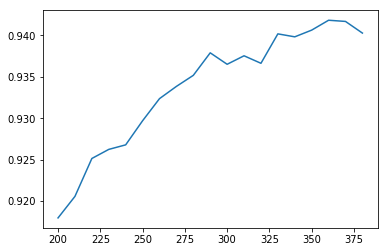

In [30]:
import matplotlib.pyplot as plt#学习曲线选择k值
score=[]
for i in range(200,390,10):
    x_fchi=SelectKBest(chi2,k=i).fit_transform(x_fsvar,y)
    score.append(cross_val_score(RFC(n_estimators=10,random_state=0),x_fchi,y,cv=10).mean())
plt.plot(range(200,390,10),score)
plt.show()

#### 看p值选择k，一般p值为0.05即选择0.05为显著性水平

In [16]:
c,p=chi2(x_fsvar,y)#c为卡方值，p为显著性

In [17]:
c.shape

(392,)

In [17]:
(p>0.05).sum()

0

In [18]:
k=c.shape[0]-(p>0.05).sum()#挑出k

In [19]:
x_fschi2 = SelectKBest(chi2,k=k).fit_transform(x_fsvar,y)

In [45]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi2,y,cv=10).mean()

0.9411190476190475

### F检验:捕捉特征与标签之间的线性关系、、、F检验分类专门针对离散标签（sklearn.feature_selection.f_classif），F检验回归专门针对连续标签(sklearn.feature_selection.f_regression)

In [18]:
from sklearn.feature_selection import f_classif
F,pvalues_f = f_classif(x_fsvar,y)

In [21]:
F.shape

(392,)

In [22]:
k=F.shape[0]-(pvalues_f>0.05).sum()

In [23]:
x_fschi2 = SelectKBest(f_classif,k=k).fit_transform(x_fsvar,y)

In [24]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi2,y,cv=10).mean()

0.9411190476190475

### 互信息法:比F检验更加强大，F检验只能找出线性关系但是互信息法可以找出任意关系，，，(sklearn.feature_selection.mutual_info_regression)互信息回归，(sklearn.feature_selection.mutual_info_classif)互信息分类.

In [19]:
from sklearn.feature_selection  import mutual_info_classif as MIC

In [56]:
result=MIC(x_fsvar,y)#result大于零表示有关系
k
k= result.shape[0] - sum(result<=0)#大于零表示有关系
k

392

In [58]:
result

array([0.07568455, 0.08111261, 0.09786271, 0.11329174, 0.11636089,
       0.10692443, 0.089386  , 0.05703803, 0.07453809, 0.10166664,
       0.11838343, 0.1430662 , 0.15482538, 0.16711223, 0.15386518,
       0.12841614, 0.0929059 , 0.06791677, 0.0376068 , 0.0288676 ,
       0.07062396, 0.09640067, 0.1228267 , 0.15390292, 0.17537294,
       0.2007116 , 0.22659061, 0.2375239 , 0.21480357, 0.17169608,
       0.13569015, 0.09896855, 0.07562242, 0.06021873, 0.04783803,
       0.0312947 , 0.06075349, 0.07544345, 0.10063803, 0.11702918,
       0.13764744, 0.14644028, 0.16467593, 0.17923488, 0.1861883 ,
       0.17235253, 0.15211295, 0.13002788, 0.10898762, 0.09850801,
       0.0795857 , 0.06728457, 0.06223384, 0.04116695, 0.06664105,
       0.07866051, 0.09096032, 0.09284325, 0.10250849, 0.10537   ,
       0.10473017, 0.11003139, 0.12260128, 0.12102312, 0.11530356,
       0.12045949, 0.11782488, 0.10351123, 0.0940973 , 0.07782718,
       0.06601466, 0.0404037 , 0.05387606, 0.07124739, 0.07545

### Embedded嵌入法：让算法自己决定用哪些特征的方法，即特征选择和算法训练同时进行，导入全部特征算法选择部分特征，再导入再选择，最后选中最多的特征权值系数最大(贡献最大)，基于贡献找出最有用的特征
#### 缺点：权值系数没有范围可以找，很难界定贡献值，计算量会基于算法，如果算法很慢，嵌入法也会很慢

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor as RFC
RFC_ = RFC(n_estimators=10,random_state=0)
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)#特征权值系数小于0.005都去掉

In [21]:
x_embedded.shape#删除了七百多个特征，根据权值系数组合成27个特征

(42000, 27)

In [22]:
#学习曲线跑阈值
x_embedded

array([[  0,   0,   0, ...,   0,  15,   0],
       [254, 217, 254, ...,   0,  86,   0],
       [254,   8,   8, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 255],
       [ 27, 253, 253, ...,   0,   0,   0],
       [  0,   0,  59, ...,   0,   0,   0]], dtype=int64)

In [31]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_embedded,y,cv=10).mean()

0.8010241235295059

In [28]:
#学习曲线来求嵌入法的阈值,
import numpy as np
import pandas as pd
threshold=np.linspace(0,(RFC_.fit(x,y).feature_importances_).max()/20,20)#因为它的第一个特征贡献值太大了所以除以20，达到平衡
threshold

array([0.        , 0.00054218, 0.00108435, 0.00162653, 0.0021687 ,
       0.00271088, 0.00325305, 0.00379523, 0.0043374 , 0.00487958,
       0.00542175, 0.00596393, 0.0065061 , 0.00704828, 0.00759045,
       0.00813263, 0.0086748 , 0.00921698, 0.00975915, 0.01030133])

In [29]:
scores=[]
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    scores.append(once)

NameError: name 'plt' is not defined

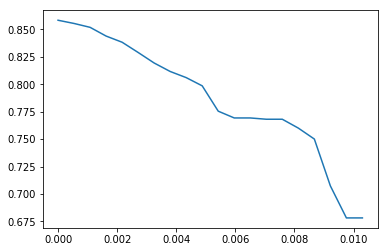

In [33]:
import matplotlib.pyplot as plt
plt.plot(threshold,scores)
plt.show()
#取最高的学习曲线后调节随机森林的n_estimators甚至高过knn算法

###  包装法：类似嵌入法，但是它是选一次用某个特定的数据挖掘算法计算特定值删除一些特征，选一次删除一些特征，最后到达规定数量的特征，计算时间低于嵌入法而高于过滤法

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RFC_,n_features_to_select=350,step=50)
#estimators实例化后评估器     n_features_to_select想要特征的数量      step每次迭代移除特征的个数
rfe.fit(x,y)
rfe.support_ #返回所有特征是否被选中的一个布尔矩阵

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True,

In [36]:
rfe.ranking_#返回特征的按数次迭代中的综合重要性排名

array([10,  9,  8,  7,  6,  6,  6,  7,  7,  6,  7,  7,  7,  6,  6,  6,  7,
        7,  6,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  5,  6,  8,  6,  5,
        5,  6,  6,  4,  4,  1,  4,  6,  4,  5,  5,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  5,  6,  4,  3,  3,  1,  1,  4,  3,  4,  3,  3,
        3,  1,  3,  3,  5,  3,  5,  7,  9,  9,  9,  9,  9,  9,  9,  6,  6,
        4,  4,  1,  1,  1,  2,  1,  1,  1,  1,  1,  3,  3,  2,  4,  5,  4,
        5,  9,  9, 10, 10, 10, 10,  9,  6,  5,  5,  5,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  4,  5,  6, 10, 10, 10,
       10,  5,  4,  4,  1,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  5,  6, 10, 10, 10,  9,  5,  5,  4,  3,  2,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,
        5,  6, 10,  4, 10

In [37]:
hh=rfe.transform(x)
hh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [245,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [38]:
cross_val_score(RFC_,hh,y,cv=10).mean()

0.862555954070255

In [ ]:
# 包装法学习曲线
score=[]
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i,step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=10).mean()
    score.append(once)
plt.figure(figsize=(20,5))
plt.plot(range(1,751,50),score)
plt.xticks(range(1751,50))
plt.show()#包装法是最容易在最少的特征达到一个很准确的模型的算法